# Predicting Heart Disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


we're going to take the following approach:
1. Problem Defination
2. Data
3. Evaluation
4. Featrues
5. Modelling 
6. Experimentation

## 1. Problem Defination:

In a statement,
> Given clinical parameters about a patien, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the cleacland data from the UCI Machine Learning Repository.

* There is also version available of Kaggle.

## 3. Evaluation:

* If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features:

This is wherer you'll get different information about each of the features in your data.

**Create data dictionary**

### Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [81]:
# import all the tools we need


# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [3]:
df.shape

(303, 14)

## Data Exploration ( Exploratory data analysis )

The goal is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question (s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
# let's find how many classes there are 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

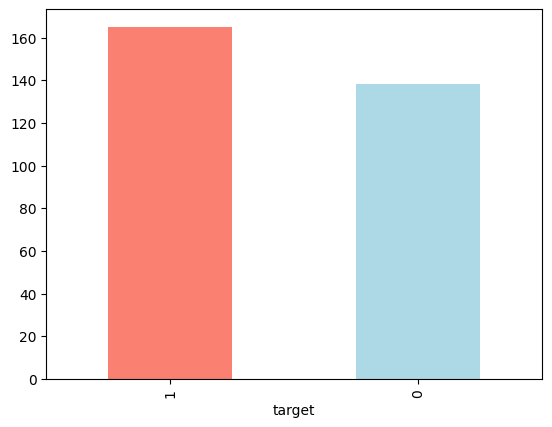

In [6]:
df['target'].value_counts().plot( kind = "bar", color=["salmon","lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

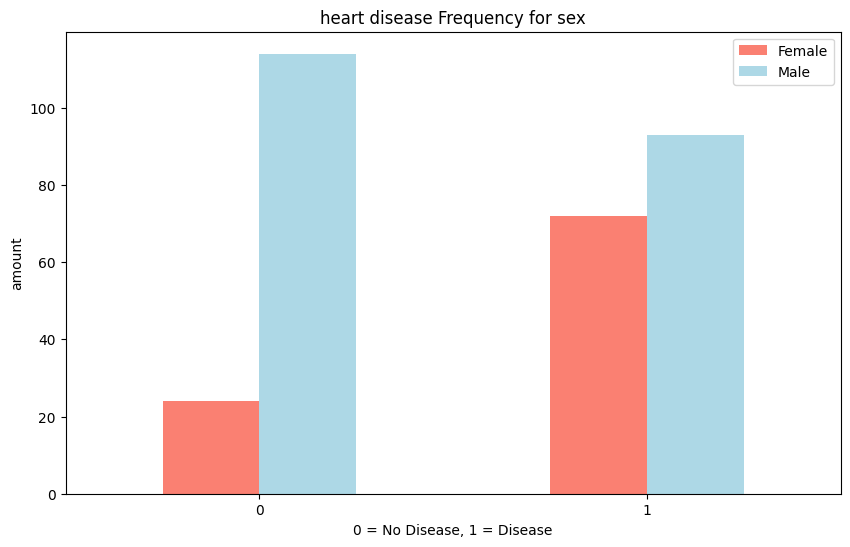

In [10]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize= (10,6),
                                    color = ["salmon","lightblue"])
plt.title("heart disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("amount")
plt.legend(["Female","Male"])
plt.xticks(rotation =0)

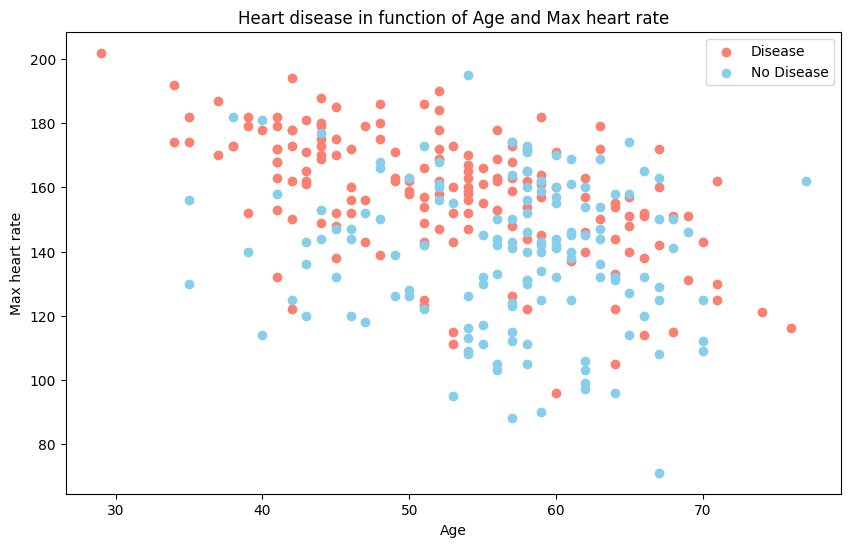

In [11]:
# Create another figure
plt.figure(figsize= (10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon")

# scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "skyblue");

# Add some healpfull info
plt.title("Heart disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate");
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

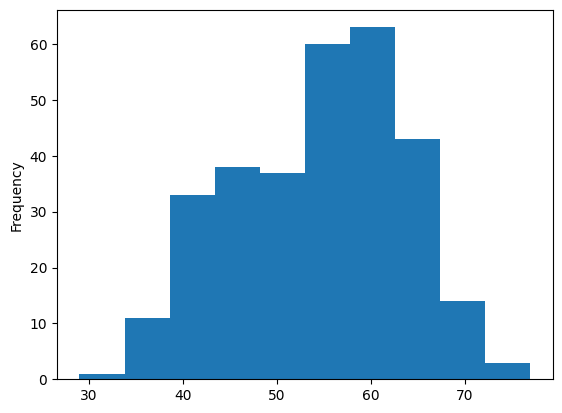

In [12]:
# Check the distribution of the age coloumn with a histogram
df.age.plot.hist()

In [13]:
## Heart Disease Frequency per chest pain type

pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

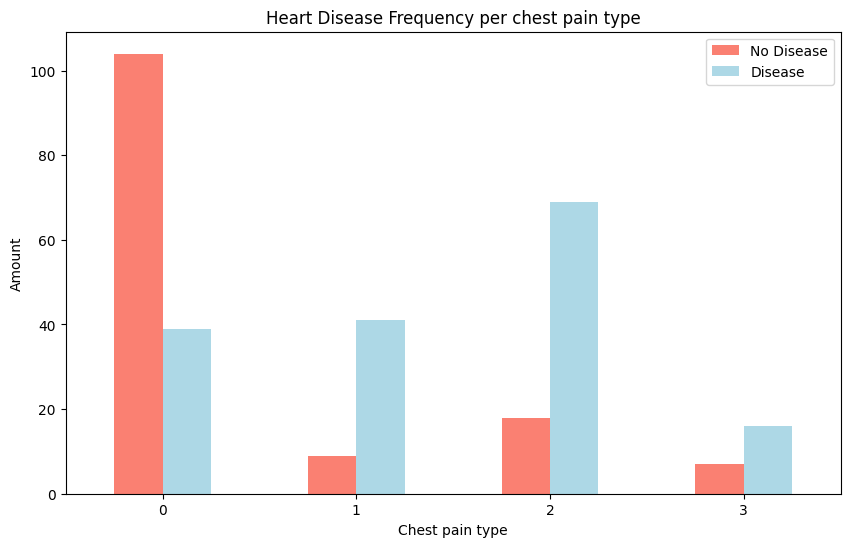

In [14]:
# Make the crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize= (10,6),
                                   color =["salmon","lightblue"])
# Add some communication
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [15]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [16]:
# Building a correlation matrix:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

(14.5, -0.5)

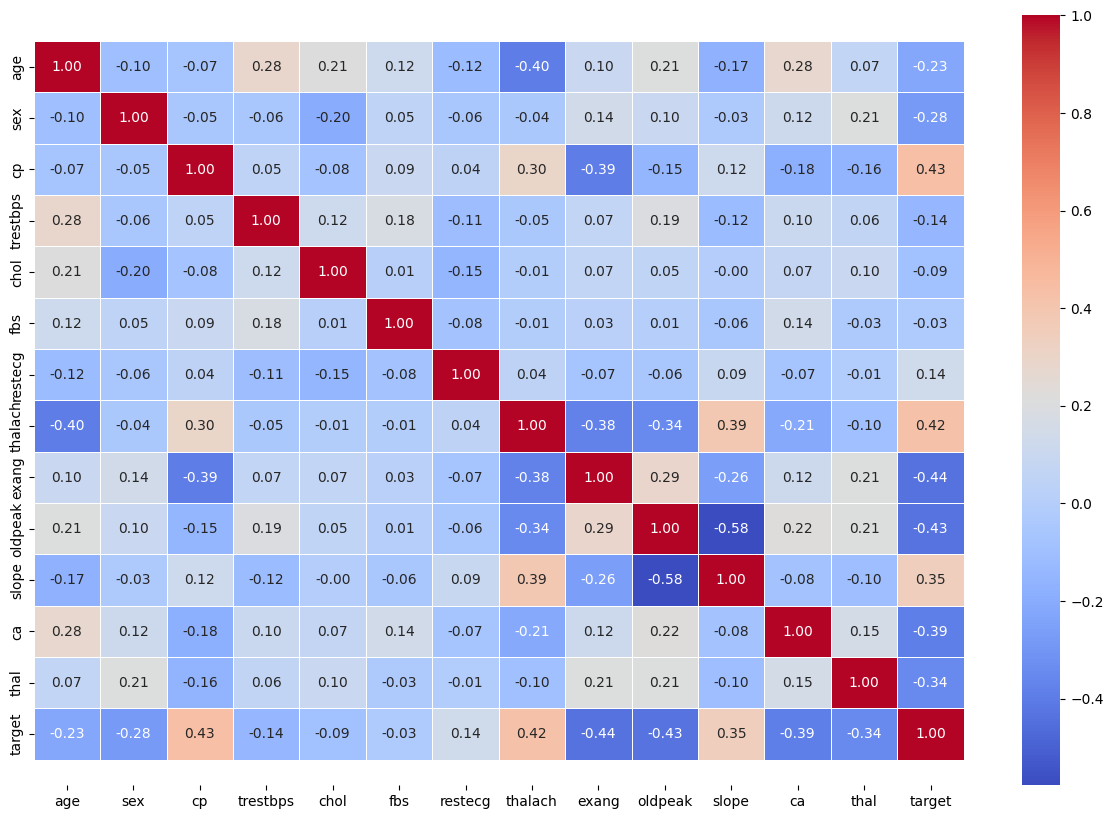

In [17]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths= 0.5,
                 fmt = '.2f',
                 cmap = 'coolwarm')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


### 5. Modeling

In [18]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [19]:
# Split data into x and y
X = df.drop("target", axis =1 )
y = df["target"]

In [20]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split data inro train test split 
np.random.seed(42)

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3

In [24]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

Now we've got our data split into training and test sets, it's time to build machine learning model

we'll train it (find the patters) on the training set

And we'll test it (use the patterns) on the test set

We're going to try 3 different machine learning models

1. Logistic Regression
2. K-Nearest Neighbors classifier
3. Random Forest Classifier

In [25]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}


# Create a function to fit and score models
def fit_and_score(model, X_train, y_train, X_test, y_test):
    """
    Fits and evaluates the given machine learning models.
    Modeels : a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    
    # make a dictionary to keep model scores
    model_scores = {}

    # Loop thorugh models
    for name, model in models.items():
        model.fit(X_train,y_train)

        # Evaluate the model
        model_scores[name]  = model.score(X_test,y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(model = models, 
                             X_train = X_train, 
                             X_test = X_test,
                            y_train = y_train, 
                            y_test = y_test)

model_scores
                            
                

c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<Axes: >

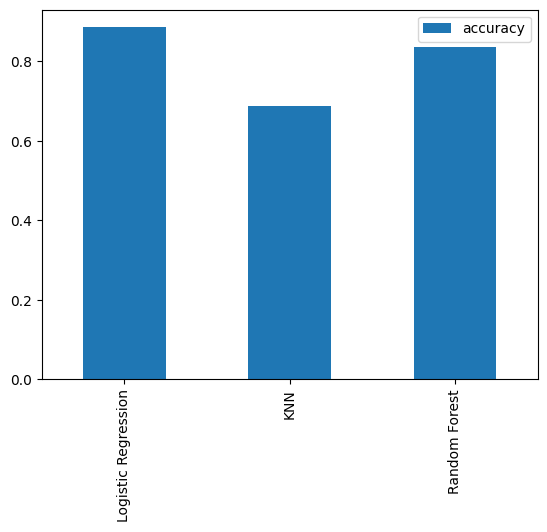

In [27]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a mode's first predictions aren't always what we should based our next strps off. What should we do?

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision 
* F1 score
* Classification Report
* ROC curve
* Area Under the Curve (AUC)

### Hyperparameter tuning

In [28]:
# Let's tune KNN

train_scores = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_score.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


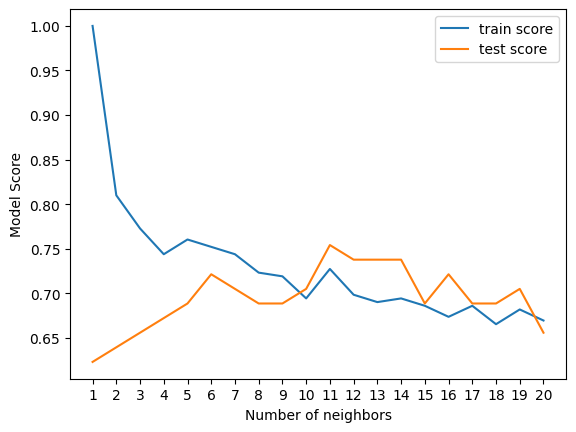

In [31]:
plt.plot(neighbors, train_scores, label = "train score")
plt.plot(neighbors, test_score, label = "test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)* 100:.2f}%")

### Hyperparameter tuning with RandomizedSerachCV

We're going to tune:

* Logistic regression()
* RandomForestClassifier()

... Using randomized serchcv

In [53]:
# Create a hyperprameter grid for Logistic regression
log_reg_grid = {"C": np.logspace(-4,4, 20),
                "solver":["liblinear"]}

# Create a hyperprameter grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(50, 1000, 50),
           "max_depth": np.arange(1, 20, 1),
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameter grids setup of our models, let's tune them using RandomizedSearchCV...

In [54]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameters search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter=20,
                                verbose= True)

# Fit Random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [55]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [56]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestclassifier()

In [57]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for randomforestclassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv = 5,
                           n_iter= 20,
                           verbose= True)

# Fit random hyperparameter search model for random forest classifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])},
                   verbose=True)

In [59]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 850,
 'min_samples_split': 10,
 'min_samples_leaf': 17,
 'max_depth': 10}

In [60]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [61]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hypterprameter tunning with GridSearchCV

Since out Logistic regression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [62]:
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver":["liblinear"],}

# Setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          verbose= True)


# Fit grid hyperparameter search for Logistic Regression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [69]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [70]:
# Evaluate the grid search Logistic regression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [71]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating out tuned machine learning classifier, beyond accuracy

* ROC cureve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

... and it would be great if cross validation was used where possible

To make comparisons and evaluate out trained model, first we need to make predictions.

In [72]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [73]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

**Later plot ROC curve**

In [98]:
from sklearn.metrics import RocCurveDisplay 

In [92]:
# Confusiton Matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


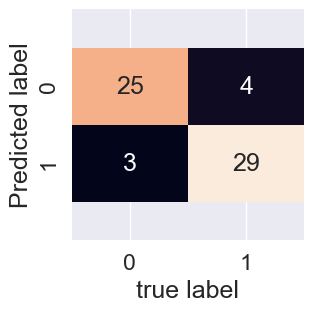

In [95]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's hearmap()
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot= True,
                     cbar = False)
    
    plt.xlabel("true label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC matrix and a confusion matrix, let's get a classification report as well as cross validation precision, recall and f1 score.

In [101]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using the cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `Cross_val_score()`

In [102]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [103]:
# create a new classifier with best paramerters

clf = LogisticRegression(C = 0.20433597178569418,
                         solver= 'liblinear')

In [112]:
# Cross-validated accuracy
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf,X,
                         y,
                         cv = 5,
                         scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [114]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [117]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv = 5, 
                               scoring= "precision")

cv_precision = np.mean(cv_precision)

cv_precision


0.8215873015873015

In [118]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv = 5,
                            scoring= "recall")

cv_recall = np.mean(cv_recall)

cv_recall

0.9272727272727274

In [121]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'f1')

cv_f1 = np.mean(cv_f1)

cv_f1

0.8705403543192143